In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Dataset

In [449]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-03 16:50:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-03 16:50:22 (5.81 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



In [450]:
df = pd.read_csv('AER_credit_card_data.csv')

In [451]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [452]:
df_ref = df.copy()

# Prearation

In [453]:
df['card'] = df['card'].replace(['yes','no'],[1,0])

In [454]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [455]:
len(df)

1319

In [476]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [477]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

In [478]:
df_train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1105,0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
431,0,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
407,1,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
1217,1,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
1133,1,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [479]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [480]:
del df_train['card']
del df_val['card']
del df_test['card']

In [481]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [482]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [483]:
numerical = ['reports', 
             'age', 
             'income', 
             'share', 
             'expenditure', 
             'dependents', 
             'months', 
             'majorcards', 
             'active']

categorical = ['owner','selfemp']

# Question 1

In [484]:
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    print((col,'%.3f' %auc))

('reports', '0.717')
('age', '0.524')
('income', '0.591')
('share', '0.989')
('expenditure', '0.991')
('dependents', '0.533')
('months', '0.529')
('majorcards', '0.534')
('active', '0.604')


# Training the model

In [490]:
columns = ["reports", 
           "age", 
           "income", 
           "share", 
           "expenditure", 
           "dependents", 
           "months", 
           "majorcards", 
           "active", 
           "owner", 
           "selfemp"]

In [488]:
df_train = df_train[["reports", 
                      "age", 
                      "income", 
                      "share", 
                      "expenditure", 
                      "dependents", 
                      "months", 
                      "majorcards", 
                      "active", 
                      "owner", 
                      "selfemp"]]

In [487]:
df_train.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner,selfemp
0,3,40.50000,4.0128,0.000299,0.00000,1,12,1,17,no,no
1,1,32.33333,6.0000,0.000200,0.00000,4,18,1,4,yes,no
2,1,29.16667,2.2000,0.038205,69.79333,0,49,1,7,no,no
3,1,54.66667,7.2900,0.106536,647.20670,2,78,1,9,yes,no
4,0,25.00000,3.3984,0.000353,0.00000,2,29,0,4,yes,no


In [494]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [497]:
val_dict = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.9696969696969697

Answer#1 share

# Question 2

In [499]:
round(roc_auc_score(y_val, y_pred),3)

0.995

Answer#2 0.995

# Question 3

In [502]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [555]:
thresholds = np.linspace(0, 1, 100)

predict_positives = []
predict_negatives = []
ps = []
rs = []
F1 = []
for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_positives.append(predict_positive)
    predict_negative = (y_pred < t)
    predict_negatives.append(predict_negative)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    ps.append(p)
    r = tp / (tp + fn)
    rs.append(r)
    f1 = 2*((p*r)/(p+r)) 
    F1.append(f1)
    print('%.2f %.5f %.5f %.5f' % (t, p, r, f1))

0.00 0.79924 1.00000 0.88842
0.01 0.86122 1.00000 0.92544
0.02 0.87190 1.00000 0.93157
0.03 0.89787 1.00000 0.94619
0.04 0.90558 1.00000 0.95045
0.05 0.90558 1.00000 0.95045
0.06 0.91739 1.00000 0.95692
0.07 0.92140 1.00000 0.95909
0.08 0.92105 0.99526 0.95672
0.09 0.92105 0.99526 0.95672
0.10 0.92511 0.99526 0.95890
0.11 0.92511 0.99526 0.95890
0.12 0.92511 0.99526 0.95890
0.13 0.95455 0.99526 0.97448
0.14 0.95853 0.98578 0.97196
0.15 0.95853 0.98578 0.97196
0.16 0.96744 0.98578 0.97653
0.17 0.97183 0.98104 0.97642
0.18 0.97183 0.98104 0.97642
0.19 0.97642 0.98104 0.97872
0.20 0.97642 0.98104 0.97872
0.21 0.97642 0.98104 0.97872
0.22 0.97642 0.98104 0.97872
0.23 0.97630 0.97630 0.97630
0.24 0.97630 0.97630 0.97630
0.25 0.97630 0.97630 0.97630
0.26 0.97630 0.97630 0.97630
0.27 0.97630 0.97630 0.97630
0.28 0.97630 0.97630 0.97630
0.29 0.97630 0.97630 0.97630
0.30 0.98086 0.97156 0.97619
0.31 0.98086 0.97156 0.97619
0.32 0.98086 0.97156 0.97619
0.33 0.98086 0.97156 0.97619
0.34 0.99515 0

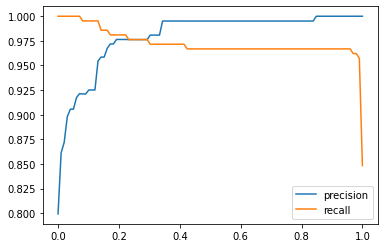

In [541]:
plt.plot(thresholds,ps,label='precision')
plt.plot(thresholds,rs,label='recall')
plt.legend()

Answer#3 0.3

# Question 4

In [557]:
round(np.max(F1),5)

0.98321

Answer#4 0.4

# Question 5

In [570]:
def train(df_train, y_train, C):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [572]:
dv, model = train(df_train, y_train, C=0.001)

In [573]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [574]:
y_pred = predict(df_val, dv, model)

In [575]:
from sklearn.model_selection import KFold

In [565]:
KFold(n_splits=5, shuffle=True, random_state=1)

KFold(n_splits=5, random_state=1, shuffle=True)

In [566]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [567]:
from tqdm.auto import tqdm

In [577]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.989 +- 0.007
C=0.01 0.992 +- 0.006
C=0.1 0.995 +- 0.004
C=0.5 0.996 +- 0.003
C=1 0.996 +- 0.003
C=5 0.996 +- 0.003
C=10 0.996 +- 0.003


Answer#5 Std = 0.003

# Question 6

Answer#6 C = 10 is the best C